# Dataset Info 
#### The Indian Premier league (IPL) is a professional twenty20 cricket 
#### league in india usually contested March and may of every year by 
#### eight teams representing eight different cities or state in india. 
#### The league was founded by board of cricket control in india (BCCI)
#### in 2007. The IPL is the most- attended cricket league in the world 
#### and the brand value of the IPL in 2019 was rs. 475 billion 

### importing the essential library

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px 

### Reading the Csv file

In [2]:
df1 = pd.read_csv('IPL Matches 2008-2020.csv')
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
df2 = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
df2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
ls = []
for i in df2['id']:
    ls.append(i)
ls = list(set(ls))


dct = []
for ids in ls:
    innings1 = 0
    innings2 = 0
    wickets1 = 0
    wickets2 = 0
    for i in df2.values:
        if (i[0] == ids) and (i[1] == 1):
            innings1 += i[9]
            wickets1 += i[11]
        elif (i[0] == ids) and (i[1] == 2):
            innings2 += i[9]
            wickets2 += i[11]

    dct.append([ids,innings1, innings2, wickets1, wickets2])

print(dct)

[[598016, 157, 153, 9, 9], [598017, 152, 152, 5, 7], [598018, 119, 108, 8, 10], [598019, 179, 92, 3, 10], [598020, 169, 83, 4, 10], [598021, 123, 127, 9, 5], [598022, 119, 124, 9, 6], [598023, 117, 123, 10, 3], [598024, 161, 165, 4, 1], [598025, 185, 186, 4, 3], [598026, 185, 186, 4, 5], [598027, 263, 133, 5, 9], [598028, 171, 164, 4, 7], [598029, 159, 162, 6, 5], [598030, 159, 160, 6, 5], [598031, 149, 150, 6, 4], [598032, 144, 146, 9, 2], [598033, 194, 136, 7, 7], [598034, 200, 186, 3, 4], [598035, 164, 149, 5, 4], [598036, 171, 173, 6, 6], [598037, 174, 170, 3, 10], [598038, 164, 127, 3, 9], [598039, 129, 130, 4, 3], [598040, 136, 137, 7, 3], [598041, 186, 171, 4, 6], [598042, 187, 170, 3, 9], [598043, 132, 133, 6, 2], [598044, 80, 81, 10, 4], [598045, 174, 176, 5, 3], [598046, 139, 79, 5, 10], [598047, 178, 182, 4, 5], [598048, 161, 162, 6, 3], [598049, 154, 155, 4, 1], [598050, 170, 105, 6, 10], [598051, 223, 146, 3, 8], [598052, 145, 147, 6, 2], [598053, 152, 106, 6, 10], [598054

In [5]:
new_df = pd.DataFrame(dct,columns = ['ids','innings1', 'innings2', 'wickets1', 'wickets2'])
new_df.head()


,ids,innings1,innings2,wickets1,wickets2
0,598016,157,153,9,9
1,598017,152,152,5,7
2,598018,119,108,8,10
3,598019,179,92,3,10
4,598020,169,83,4,10


In [6]:
df2 = df2.groupby(by = 'id').sum()

/tmp/ipykernel_6527/986953964.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df2.groupby(by = 'id').sum()


In [7]:
df = pd.merge(df1,df2,on = 'id')

In [8]:
# describing the dataset 

In [9]:
df.describe()

,id,neutral_venue,result_margin,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,8.160000e+02,816.000000,799.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,7.563496e+05,0.094363,17.321652,351.403186,2175.810049,857.321078,294.050245,15.746324,309.796569,0.019608,11.636029
std,3.058943e+05,0.292512,22.068427,39.086664,316.109617,83.685974,54.978556,5.966418,55.739757,0.138733,3.096188
min,3.359820e+05,0.000000,1.000000,63.000000,88.000000,178.000000,51.000000,2.000000,56.000000,0.000000,3.000000
25%,5.012278e+05,0.000000,6.000000,348.000000,2131.750000,844.000000,264.000000,11.000000,279.000000,0.000000,9.750000
50%,7.292980e+05,0.000000,8.000000,365.000000,2295.500000,876.000000,297.000000,15.000000,314.000000,0.000000,12.000000
75%,1.082626e+06,0.000000,19.500000,371.000000,2351.000000,899.000000,329.000000,19.000000,345.000000,0.000000,14.000000
max,1.237181e+06,1.000000,146.000000,396.000000,2502.000000,996.000000,448.000000,38.000000,469.000000,1.000000,20.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  inning          

In [11]:
#checking for null values 

In [12]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
inning               0
over                 0
ball                 0
batsman_runs         0
extra_runs           0
total_runs           0
non_boundary         0
is_wicket            0
dtype: int64

In [13]:
# dealing with the null values

df['player_of_match']  = df.player_of_match.fillna('No P.O.M')
df['winner']           = df.winner.fillna('No winner')
df['result']           = df.result.fillna('No result')
df['method']           = df['method'].fillna('Match Complete')
df['eliminator']       = df['eliminator'].fillna('N')
df['result_margin']    = df['result_margin'].fillna('no result')

In [14]:
# In city the null values are depending on the venue 

city = []
for i in df.values:
    if i[4] == 'Sharjah Cricket Stadium':                          
        city.append(str(i[1]).replace('nan','Sharjah'))
    elif i[4] == 'Dubai International Cricket Stadium':
        city.append(str(i[1]).replace('nan','Dubai'))
    else:
        city.append(i[1])
        
df['city'] = city        
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,umpire1,umpire2,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,Asad Rauf,RE Koertzen,326,1894,831,268,36,304,0,13
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,MR Benson,SL Shastri,372,2338,898,430,17,447,0,9
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,Aleem Dar,GA Pratapkumar,316,1845,792,244,17,261,0,9
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,SJ Davis,DJ Harper,369,2320,884,315,16,331,0,12
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,BF Bowden,K Hariharan,362,2136,890,184,38,222,0,15


In [15]:
df['date'] = pd.to_datetime(df['date'])


In [16]:
year = []
for i in df['date'].dt.year:
    year.append(i)
    
df['year'] = year

In [17]:
df[df['ball'] >= df['ball'].quantile(0.99)]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,umpire2,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,year
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,...,M Erasmus,386,2469,956,272,28,300,0,14,2009
151,419142,Chennai,2010-04-06,SK Raina,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,...,DJ Harper,386,2435,961,274,32,306,0,13,2010
197,501221,Mumbai,2011-04-22,Harbhajan Singh,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,...,AM Saheba,386,2443,962,296,24,320,0,13,2011
456,734047,Mumbai,2014-05-30,V Sehwag,Wankhede Stadium,0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,...,RJ Tucker,385,2443,963,401,27,428,0,13,2014
474,829737,Bangalore,2015-04-19,Harbhajan Singh,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,...,VA Kulkarni,396,2466,996,367,33,400,0,14,2015
507,829805,Mumbai,2015-05-14,HH Pandya,Wankhede Stadium,0,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,...,VA Kulkarni,383,2462,956,319,18,337,0,11,2015
510,829811,Mumbai,2015-05-16,SR Watson,Brabourne Stadium,0,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,...,RK Illingworth,393,2502,978,353,36,389,0,15,2015
743,1178423,Hyderabad,2019-04-29,DA Warner,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,...,S Ravi,384,2426,962,352,27,379,0,14,2019
786,1216522,Dubai,2020-10-17,AB de Villiers,Dubai International Cricket Stadium,0,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,...,Nitin Menon,389,2447,975,333,23,356,0,9,2020


### Q1. what was the count of matches played in each season ?


In [18]:
years = []
for i in df.values:
    years.append(i[25])
    
years = list(set(years))

matches = []
for year in years:
    c = 0
    for i in df.values:
        if (i[25] == year):
            c+= 1
    matches.append([year,c])
    
match_per_season = pd.DataFrame(matches,columns = ['years','matches'])
match_per_season = match_per_season.sort_values(by = 'years',ascending = True)

match_per_season

,years,matches
5,2008,58
6,2009,57
7,2010,60
8,2011,73
9,2012,74
10,2013,76
11,2014,60
12,2015,59
0,2016,60
1,2017,59


<AxesSubplot:xlabel='years', ylabel='matches'>

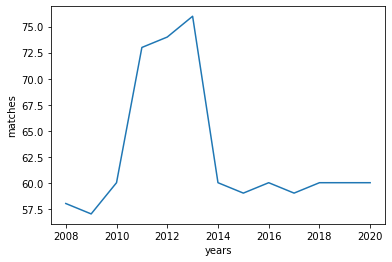

In [19]:
# visualization

sns.lineplot(x = match_per_season['years'],y = match_per_season['matches'])


### Q2. How many runs were scored in each season ?


In [20]:
years = []
for i in df.values:
    years.append(i[25])
    
years = list(set(years))

runs = []
for year in years:
    c = 0
    for i in df.values:
        if (i[25] == year):
            c+= i[22]
    runs.append([year,c])
    
runs_per_season = pd.DataFrame(runs,columns = ['years','runs'])
runs_per_season = runs_per_season.sort_values(by = 'years',ascending = True)
runs_per_season

,years,runs
5,2008,17937
6,2009,16320
7,2010,18864
8,2011,21154
9,2012,22453
10,2013,22541
11,2014,18909
12,2015,18332
0,2016,18862
1,2017,18769


<AxesSubplot:xlabel='years', ylabel='runs'>

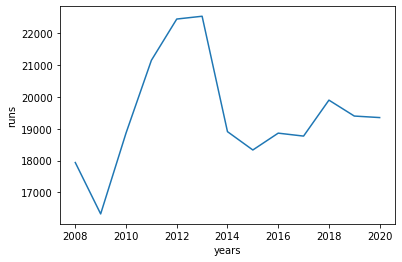

In [21]:
sns.lineplot(x = runs_per_season['years'],y = runs_per_season['runs'])

### Q3.what were the runs scored per match in different seasons ?


In [22]:
years = []
for i in df.values:
    years.append(i[25])
    
years = list(set(years))

runs_ = []
for year in years:
    run = 0
    c   = 0 
    for i in df.values:
        if (i[25] == year):
            run += i[22]
            c   += 1
    runs_.append([year,run, c, run//c])

runs_per_match = pd.DataFrame(runs_, columns = ['year','total_runs','total_matches','runs_per_matches'])
runs_per_match =  runs_per_match.sort_values(by = 'year',ascending = True)

In [23]:
runs_per_match

,year,total_runs,total_matches,runs_per_matches
5,2008,17937,58,309
6,2009,16320,57,286
7,2010,18864,60,314
8,2011,21154,73,289
9,2012,22453,74,303
10,2013,22541,76,296
11,2014,18909,60,315
12,2015,18332,59,310
0,2016,18862,60,314
1,2017,18769,59,318


<AxesSubplot:xlabel='year', ylabel='runs_per_matches'>

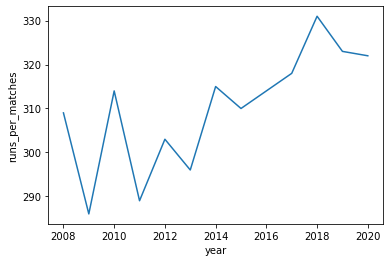

In [24]:
sns.lineplot(x = runs_per_match['year'], y = runs_per_match['runs_per_matches'])     # line chart 

### Q4. who has umpired the most ?


In [25]:
dct = {}
for i in df.values:
    if i[15] in dct and i[16]  in dct:
        dct[i[15]] += 1 
        dct[i[16]] += 1
    else:
        dct[i[15]] = 1 
        dct[i[16]] = 1

print('Umpire Name :',list(dct.keys())[list(dct.values()).index(max(dct.values()))])
print('Matches     :', max(dct.values()))   

# c shamshuddin is the umpire who has umpired the most in the ipl history

Umpire Name : C Shamshuddin
Matches     : 82


In [54]:
umpire = pd.DataFrame()
umpire['Names'] = dct.keys()
umpire['Total Matches'] = dct.values()
umpire = umpire.loc[umpire['Total Matches'] > umpire['Total Matches'].median()]
umpire

,Names,Total Matches
0,Asad Rauf,51
1,RE Koertzen,30
4,Aleem Dar,15
9,K Hariharan,21
10,RB Tiffin,29
12,AM Saheba,20
19,M Erasmus,27
21,HDPK Dharmasena,16
22,S Asnani,30
24,SK Tarapore,31


In [53]:
# top 28 umpires 
fig = px.pie(umpire , values = 'Total Matches', names = 'Names', title = 'most umpiring by an umpire')
fig.show()

### Q5.which team has won the most tosses ?


In [31]:
most_tosses = {}
for i in df.values:
    if i[8] in most_tosses:
        most_tosses[i[8]] += 1
    else:
        most_tosses[i[8]]  = 1

print('Most tosses Won By :',list(most_tosses.keys())[list(most_tosses.values()).index(max(most_tosses.values()))])
print('Tosses won         :', max(most_tosses.values()))

# thus mumbai indians have won 106 toss in total

Most tosses Won By : Mumbai Indians
Tosses won         : 106


### Q6.what does the team decide after winning the toss ?


In [32]:
bat   = 0
field = 0
for i in df.values:
    if (i[9] == 'bat'):
        bat += 1
    else:
        field += 1
        
print('Number of times team decides to bat first        :',bat)
print('Number of times team decides to bowl/field first :',field)

# we can conclude that the toss winning captain decides to field first most number of times in the ipl history

Number of times team decides to bat first        : 320
Number of times team decides to bowl/field first : 496


### Q7.how does the toss decision vary across seasons ?


In [33]:
years = []
for i in df.values:
    years.append(i[25])
    
years = list(set(years))

toss_per_seasons = []
for year in years:
    bat  = 0
    bowl = 0
    for i in df.values:
        if (i[25] == year):
            if (i[9] == 'bat'):
                bat += 1
            else:
                bowl += 1
    toss_per_seasons.append([year,bat,bowl])
toss_per_season = pd.DataFrame(toss_per_seasons,columns = ['year','bat_toss','bowl_toss'])
toss_per_season = toss_per_season.sort_values(by='year',ascending = True)
toss_per_season


,year,bat_toss,bowl_toss
5,2008,26,32
6,2009,35,22
7,2010,39,21
8,2011,25,48
9,2012,37,37
10,2013,45,31
11,2014,19,41
12,2015,25,34
0,2016,11,49
1,2017,11,48


### Q8.does winning the toss imply winning the game ?


In [34]:
c = 0
for i in df.values:
    if (i[8] != i[10]):
        c += 1
print(100-(c/816)*100)

# we can conclude that toss can imply that there is 50 percentage certainity that the toss winning team will win 
# the game 
# that there is 51:49 of same team winning the game : opposite team winning the game 

51.22549019607843


### Q9.how many times has the chasing team won the matches ?


In [35]:
c = 0 
for i in df.values:
    if i[11] == 'wickets':
        c += 1
        
print('Number of times chasing team won the matches :',c)

# 435 times chasing team has won the matches

Number of times chasing team won the matches : 435


### Q10.which all teams had won this tournament ?


### Q11.which team has played the most number of matches ?


In [36]:
teams = {}
for i in df.values:
    if i[6] not in teams or i[7] not in teams:
        teams[i[6]] = 1
        teams[i[7]] = 1
    else:
        teams[i[6]] += 1
        teams[i[7]] += 1

print('Name of the Team       :',list(teams.keys())[list(teams.values()).index(max(teams.values()))])
print('Most number of matches :',max(teams.values()))

# thus we can conclude that KKR has played more number of matches with 191 total number of matches since 2008-2020

Name of the Team       : Kolkata Knight Riders
Most number of matches : 191


### Q12.which team has won the most number of times ?


In [37]:
winner = {}
for i in df['winner']:
    if i in winner:
        winner[i] += 1
    else:
        winner[i] = 1
        
print('Name of the team         :',list(winner.keys())[list(winner.values()).index(max(winner.values()))])
print('Number of times team won :',max(winner.values()))

# Thus we can conclude that mumbai indians have won the most number of matches with 120 wins

Name of the team         : Mumbai Indians
Number of times team won : 120


### Q13.which team has the  highest winning percentage ?


In [38]:
teams = {}
for i in df.values:
    if i[6] not in teams or i[7] not in teams:
        teams[i[6]] = 1
        teams[i[7]] = 1
    else:
        teams[i[6]] += 1
        teams[i[7]] += 1

winner = {}
for i in df['winner']:
    if i in winner:
        winner[i] += 1
    else:
        winner[i] = 1
        
print(teams)
print('-'*100)
print(winner)

{'Royal Challengers Bangalore': 149, 'Kolkata Knight Riders': 191, 'Kings XI Punjab': 70, 'Chennai Super Kings': 178, 'Delhi Daredevils': 161, 'Rajasthan Royals': 161, 'Mumbai Indians': 32, 'Deccan Chargers': 75, 'Kochi Tuskers Kerala': 14, 'Pune Warriors': 16, 'Sunrisers Hyderabad': 124, 'Rising Pune Supergiants': 14, 'Gujarat Lions': 30, 'Rising Pune Supergiant': 16, 'Delhi Capitals': 33}
----------------------------------------------------------------------------------------------------
{'Kolkata Knight Riders': 99, 'Chennai Super Kings': 106, 'Delhi Daredevils': 67, 'Royal Challengers Bangalore': 91, 'Rajasthan Royals': 81, 'Kings XI Punjab': 88, 'Deccan Chargers': 29, 'Mumbai Indians': 120, 'Pune Warriors': 12, 'Kochi Tuskers Kerala': 6, 'No winner': 4, 'Sunrisers Hyderabad': 66, 'Rising Pune Supergiants': 5, 'Gujarat Lions': 13, 'Rising Pune Supergiant': 10, 'Delhi Capitals': 19}


In [43]:
winner.values()

dict_values([99, 106, 67, 91, 81, 88, 29, 120, 12, 6, 4, 66, 5, 13, 10, 19])

In [44]:
teams.values()

dict_values([149, 191, 70, 178, 161, 161, 32, 75, 14, 16, 124, 14, 30, 16, 33])

### Q14. is there any lucky venue for a particular team ?


In [148]:
15*36

540

### Q15.innings wise comparison between teams ? 


### Q16.which team has scored the most number of 200+ scores ?


### Q17.which team has conceded 200+ scores the most ?


In [149]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,umpire2,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,RE Koertzen,326,1894,831,268,36,304,0,13,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,...,SL Shastri,372,2338,898,430,17,447,0,9,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,...,GA Pratapkumar,316,1845,792,244,17,261,0,9,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,...,DJ Harper,369,2320,884,315,16,331,0,12,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,K Hariharan,362,2136,890,184,38,222,0,15,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,...,PR Reiffel,373,2353,897,387,15,402,0,8,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,...,Nitin Menon,373,2362,892,333,10,343,0,13,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,S Ravi,370,2296,894,249,14,263,0,11,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,...,S Ravi,375,2365,911,347,14,361,1,11,2020


### Q18.what was the highest run scored by a team in a single match ?


### Q19.which is the biggest win in terms of run margin ?


In [39]:
run_margin = []
for i in df.values:
    if i[11] == 'runs':
        run_margin.append(i[12])
        
print('Biggest win in terms of run margin :',max(run_margin))

Biggest win in terms of run margin : 146.0


### Q20.which batsmen have played the most number of balls ?


In [ ]:
df2 = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')



### Q21.who are the leading run-scorers of all time ? 


### Q22.who has hit the most number of 4's ?


In [140]:
four_bat = {}
for i in df2.values:
    if i[4] not in four_bat:
        four_bat[i[4]] = 0
    elif i[7] == 4 and i[4] in four_bat:
        four_bat[i[4]] += 1
        
batsman_4 = pd.DataFrame()
batsman_4['name'] = four_bat.keys()
batsman_4['number of fours'] = four_bat.values()
batsman_4 = batsman_4[batsman_4['number of fours'] >= batsman_4['number of fours'].mean()].sort_values(by='number of fours',ascending = False)
batsman_4.head(1)

,name,number of fours
31,S Dhawan,591


In [147]:
# Top 15 four hitting batsman 
batsman_4 = batsman_4.head(15)

# plotting the graph
fig = px.pie(batsman_4,values = 'number of fours',names = 'name' ,title = "Most number of 4's hit by a batsman")
fig.show()

### Q23.who has hit the most number of 6's ?


In [138]:
six_bat = {}
for i in df2.values:
    if i[4] not in six_bat:
        six_bat[i[4]] = 0
    elif i[7] == 6 and i[4] in six_bat:
        six_bat[i[4]] += 1
        
batsman_6 = pd.DataFrame()
batsman_6['name'] = six_bat.keys()
batsman_6['number of sixes'] = six_bat.values()
batsman_6 = batsman_6[batsman_6['number of sixes'] >= batsman_6['number of sixes'].mean()].sort_values(by='number of sixes',ascending = False)
batsman_6.head(1)

,name,number of sixes
163,CH Gayle,349


In [145]:
#top 15 batsman 
batsman_6 = batsman_6.head(15)

# plotting the graph
fig = px.pie(batsman_6,values = 'number of sixes',names = 'name' ,title = "Most number of 6's hit by a batsman")
fig.show()

### Q24.who has the highest strike rate ?


### Q25.who is the leading wicket-taker ?


In [102]:
wick = {}
for i in df2.values:
    if i[6] not in wick:
        wick[i[6]] = 0
    elif i[11] == 1 and i[6] in wick:
        wick[i[6]] += 1
        
bowler = pd.DataFrame()
bowler['Names'] = wick.keys()
bowler['Wickets_Taken'] = wick.values()
bowler = bowler[bowler['Wickets_Taken'] >= bowler['Wickets_Taken'].median()].sort_values(by='Wickets_Taken',ascending = False)
bowler.head(1)

,Names,Wickets_Taken
100,SL Malinga,188


In [118]:
# removing the outlier 
bowler = bowler[bowler['Wickets_Taken'] >= bowler['Wickets_Taken'].quantile(0.75)]

# ploting using plotly
fig = px.pie(bowler, values = 'Wickets_Taken', names = 'Names',title = 'Most wicket taken by a Bowler')
fig.show()

### Q26.Which stadium haas hosted the most number of matches ?

In [120]:
venue = {}
for i in df.values:
    if i[4] not in venue:
        venue[i[4]] = 1
    else:
        venue[i[4]] += 1

print('Venue Name              :',list(venue.keys())[list(venue.values()).index(max(venue.values()))])
print('Number of times hosted  :', max(venue.values()))   

Venue Name              : Eden Gardens
Number of times hosted  : 77


In [121]:
venues = pd.DataFrame()
venues['V_name'] = venue.keys()
venues['Times_hosted'] = venue.values()
venues

,V_name,Times_hosted
0,M Chinnaswamy Stadium,65
1,"Punjab Cricket Association Stadium, Mohali",35
2,Feroz Shah Kotla,74
3,Wankhede Stadium,73
4,Eden Gardens,77
5,Sawai Mansingh Stadium,47
6,"Rajiv Gandhi International Stadium, Uppal",64
7,"MA Chidambaram Stadium, Chepauk",57
8,Dr DY Patil Sports Academy,17
9,Newlands,7


In [123]:
fig = px.pie(venues, values = 'Times_hosted', names = 'V_name',title = 'Number of times a particular Venue Hosted Matches')
fig.show()